In [1]:
import math
import torch
import torch.nn as nn

class FixedEmbedding(nn.Module):
    def __init__(self, c_in, d_model):
        super(FixedEmbedding, self).__init__()

        w = torch.zeros(c_in, d_model).float()
        w.require_grad = False

        position = torch.arange(0, c_in).float().unsqueeze(1)
        div_term = (torch.arange(0, d_model, 2).float() * -(math.log(10000.0) / d_model)).exp()

        w[:, 0::2] = torch.sin(position * div_term)
        w[:, 1::2] = torch.cos(position * div_term)

        self.emb = nn.Embedding(c_in, d_model)
        self.emb.weight = nn.Parameter(w, requires_grad=False)

    def forward(self, x):
        return self.emb(x).detach()

In [8]:
# Define the size of the input (sequence length) and the embedding dimension
c_in = 100  # Example: maximum sequence length of 100
d_model = 64  # Example: embedding size of 64

# Create the FixedEmbedding instance
fixed_embedding = FixedEmbedding(c_in, d_model)

# Example input: a batch of sequences with arbitrary indices
# Assume the batch size is 2, and sequence length is 10 for this example
batch_size = 2
seq_length = 10
example_input = torch.randint(low=0, high=c_in, size=(batch_size, seq_length))

# Pass the input through the embedding layer
output = fixed_embedding(example_input)

print(f"Input size: {example_input.size()}")
print(f"Output size: {output.size()}")


Input size: torch.Size([2, 10])
Output size: torch.Size([2, 10, 64])


Example input is token
After embedding, a token is converted to #(d_model=64) of numbers.

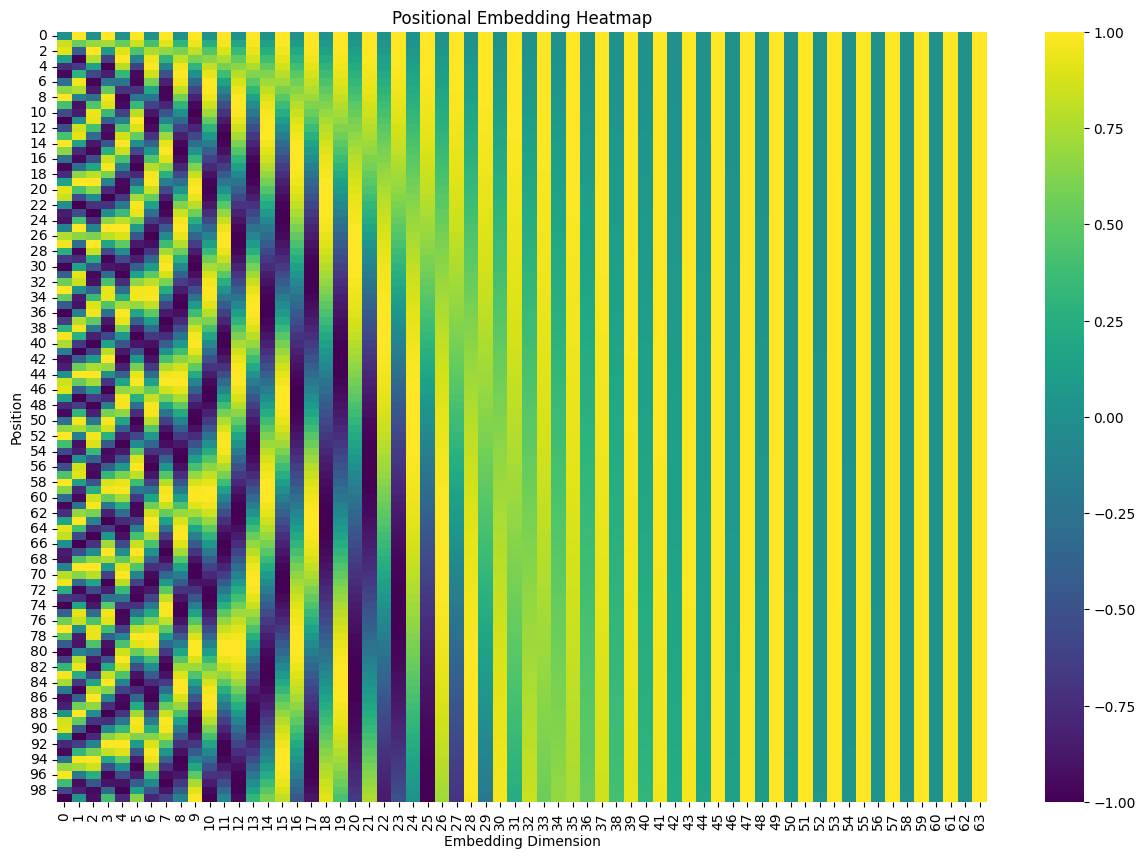

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Retrieve the weight matrix
w = fixed_embedding.emb.weight

# Convert w to a numpy array for visualization
w_np = w.numpy()

# Plot the heatmap using seaborn
plt.figure(figsize=(15, 10))
sns.heatmap(w_np, cmap='viridis', cbar=True)
plt.title('Positional Embedding Heatmap')
plt.xlabel('Embedding Dimension')
plt.ylabel('Position')
plt.show()
